# Natural Language Processing

## Twitter Sentiment Analysis

##### 1. Understand the Problem Statement/Business Case

- NLP works by converting words into numbers.
- The numbers are used to train the model to make predictions.
- Predictions could be social media posts/product reviews.
- The process can be automated to review millions of tweets and customer reviews.
- This project will analyze thousands of tweets to predict the people's sentiment.

##### 2. Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweets_df = pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


<img src="./img/tweetClassification.png"/>

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [6]:
tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


##### 3. Explore Dataset

In [7]:
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

<AxesSubplot:>

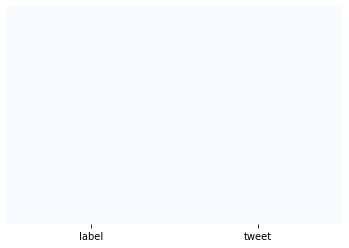

In [8]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

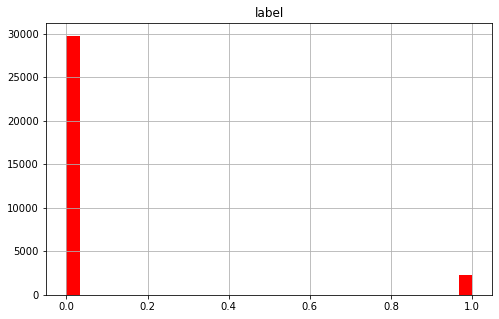

In [9]:
tweets_df.hist(bins=30, figsize=(8, 5), color='r')

<AxesSubplot:xlabel='label', ylabel='count'>

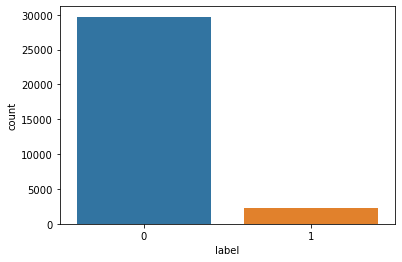

In [10]:
sns.countplot(tweets_df['label'], label='Count')

In [11]:
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

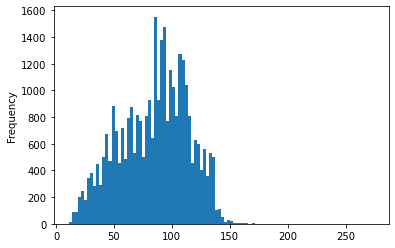

In [12]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [13]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [14]:
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [15]:
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [16]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [17]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


##### 4. Plot the Word Cloud

In [18]:
sentences = tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [19]:
len(sentences)

31962

In [20]:
sentences_as_one_string = " ".join(sentences)

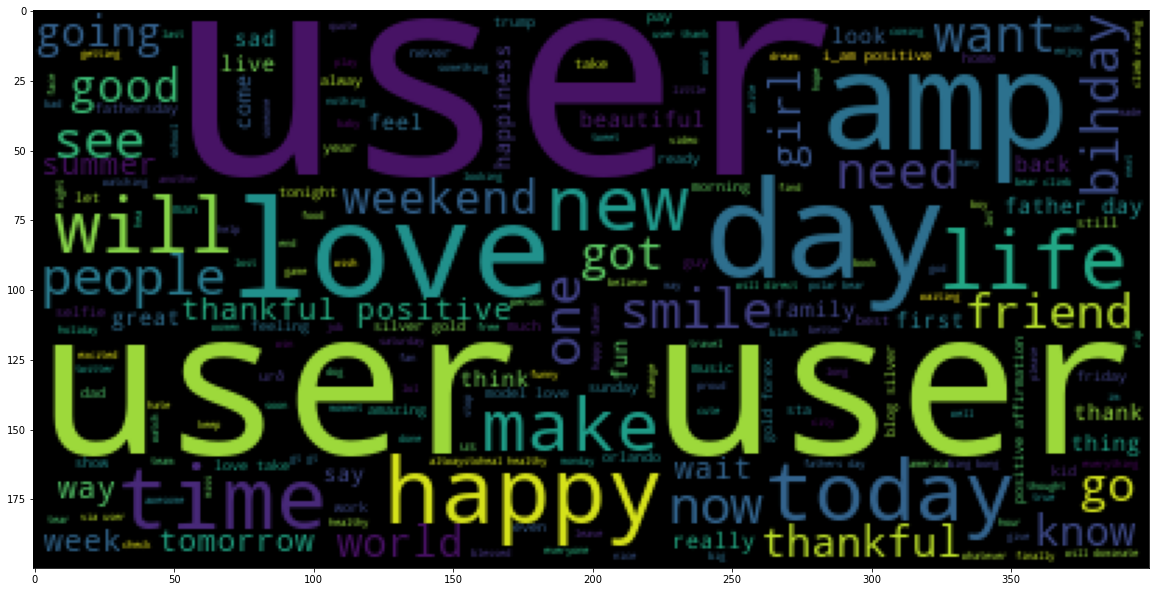

In [21]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

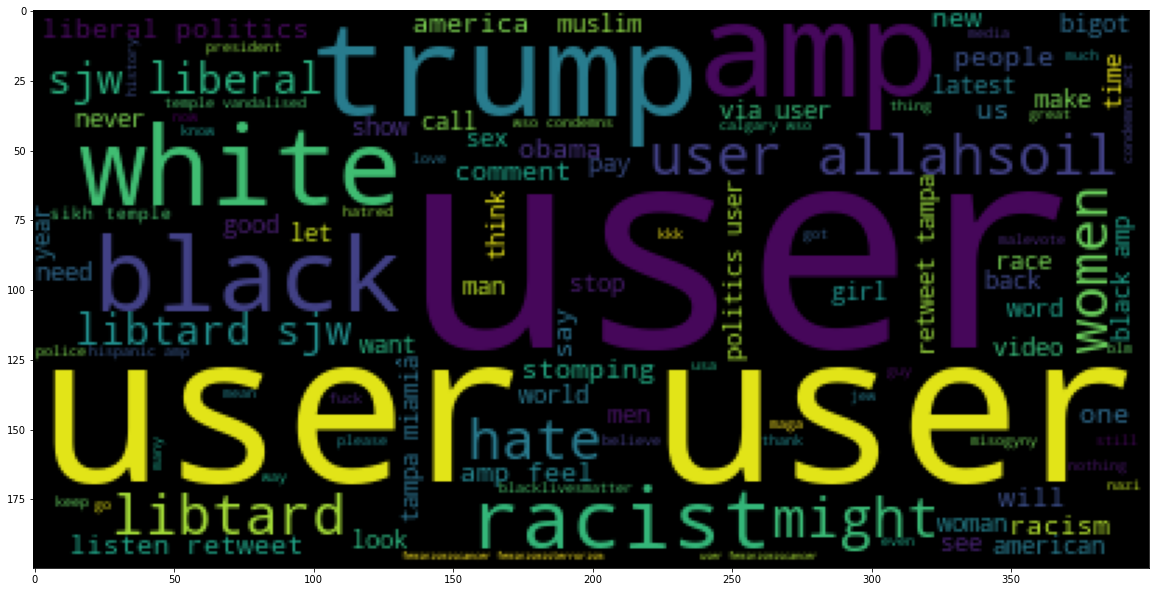

In [22]:
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

#### 5. Data Cleaning 

##### a. Remove Punctuation

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
Test_punc_removed = [ char for char in Test if char not in string.punctuation ]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

##### b. Remove Stopwords

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

##### 6. Perform Count Vectorization (Tokenization)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.',
               'This document is the second paper.',
               'And this is the third one.',
               'Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [28]:
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']
[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


##### 7. Pipeline to remove punctuations, stopwords and perform count vectorization on the dataset

In [29]:
def message_cleaning(message):
    # Remove Punctuation from every tweet
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    # Remove Stopwords from every tweet
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [30]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [31]:
print(tweets_df['tweet'][5])
print(tweets_df_clean[5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [32]:
# Count Vectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [33]:
print(vectorizer.get_feature_names())

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [34]:
tweets_countvectorizer.shape

(31962, 47386)

In [35]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

In [36]:
X = tweets
y = tweets_df['label']

##### 8. Understanding Naive Bayes Classifier

##### 9. Train a Naive Bayes Classifier Model

##### Naive Bayes

Naive Bayes is a classification technique based on Bayes Theorem.

<img src="./img/naiveBayes.png">

In [37]:
X.shape

(31962, 47386)

In [38]:
y.shape

(31962,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

##### 10. Access trained model performance

##### Confusion Matrix

<img src="./img/confusionMatrix.png">

<AxesSubplot:>

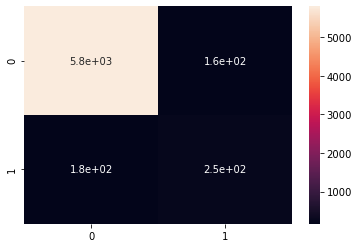

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5967
           1       0.60      0.58      0.59       426

    accuracy                           0.95      6393
   macro avg       0.78      0.77      0.78      6393
weighted avg       0.95      0.95      0.95      6393

